# 1. Water Consumer Data training

## 1.1. Initialization

In [27]:
from IPython.display import display
import pandas as pd

df_train = pd.read_csv('src/train.csv')
df_train

,Year,Month,Consumer_type,Consumption,Consumer_number,Installation_zone
0,2013,1,domestic,0,MOGV36480546611521,Installation_zone 1
1,2013,1,industrial,5,BECS02817768252637,Installation_zone 2
2,2013,1,domestic,6,VRFW65577141436242,Installation_zone 2
3,2013,1,domestic,1,QLLI18662653137621,Installation_zone 2
4,2013,1,domestic,13,HYUO61823402850645,Installation_zone 2
...,...,...,...,...,...,...
329970,2020,12,domestic,0,ZSOE03393580274296,Installation_zone 2
329971,2020,12,rural domestic,0,RVZG94535208799772,Installation_zone 47
329972,2020,12,rural domestic,0,DWGA69725679861554,Installation_zone 7
329973,2020,12,rural domestic,0,VJDC45865594518045,Installation_zone 32


## 2. Training Tests

### 2.0. Pré processing

In [28]:
from numpy import random

SEED = 42
random.seed(SEED)

In [29]:
from datetime import datetime

df = df_train.copy()
map_names = {
    'Year': 'year',
    'Month': 'month',
    'Consumer_type': 'consumer_type',
    'Consumption': 'consumption',
    'Consumer_number': 'consumer_number',
    'Installation_zone': 'installation_zone',
}
df = df.rename(columns=map_names)
df = df.drop(columns=['consumer_number'])
df.installation_zone = df.installation_zone.str.replace('Installation_zone ', '').astype(int)
# df['age'] = datetime.now().year - df.year
# df = df.drop(columns=['year'])

Y = df.consumer_type
X = df.drop(columns=['consumer_type'])

X

,year,month,consumption,installation_zone
0,2013,1,0,1
1,2013,1,5,2
2,2013,1,6,2
3,2013,1,1,2
4,2013,1,13,2
...,...,...,...,...
329970,2020,12,0,2
329971,2020,12,0,47
329972,2020,12,0,7
329973,2020,12,0,32


In [30]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, stratify=Y)

print('Train size: ', len(x_train))
print('Test size: ', len(x_test))


Train size:  247481
Test size:  82494


In [31]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

x_train

array([[-1.16792715,  1.56368704, -0.34390487, -0.3672939 ],
       [-0.32661792,  1.56368704, -0.08964868, -0.55098   ],
       [ 0.93534593, -1.56594607,  0.16460752, -0.55098   ],
       ...,
       [ 1.35600055,  1.56368704, -0.34390487, -0.45913695],
       [ 0.51469131, -1.56594607, -0.14049992, -0.3672939 ],
       [ 0.0940367 , -0.99692186, -0.19135116, -0.3672939 ]])

### 2.1 Training with KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

knn_accuracy = accuracy_score(y_test, y_pred)*100
knn_precision = precision_score(y_test, y_pred, average='macro')*100
knn_recall = recall_score(y_test, y_pred, average='macro')*100
knn_f1 = f1_score(y_test, y_pred, average='macro')*100

print(f'Accuracy: {knn_accuracy:.2f}%')
print(f'Precision: {knn_precision:.2f}%')
print(f'Recall: {knn_recall:.2f}%')
print(f'F1: {knn_f1:.2f}%')


Accuracy: 90.29%
Precision: 41.26%
Recall: 32.09%
F1: 33.50%


/run/media/guedes/HD/ipb/ml4ds/water-consumption/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 3. Analysis results

### 3.1 Confusion Matrix

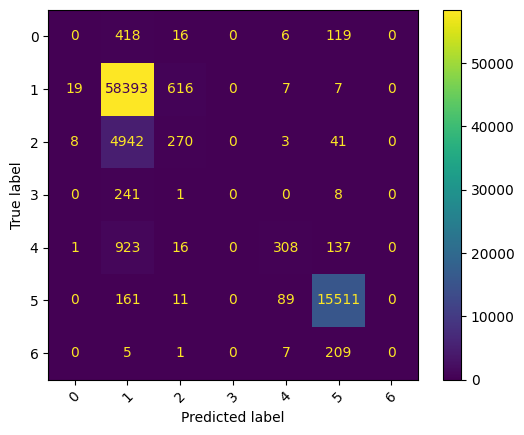

In [33]:
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# rotate the xticks

disp.plot(xticks_rotation=45)


### 3.2 Curva ROC

In [35]:
from sklearn.metrics import roc_auc_score

roc_score = roc_auc_score(y_test, y_pred, multi_class='ovo')

print(f'ROC AUC score: {roc_score:.2f}')


AxisError: axis 1 is out of bounds for array of dimension 1